In [1]:
from sympy import init_printing
init_printing() 

In [2]:
from sympy import Symbol,Matrix,symbols
from sympy import I,conjugate,re,im
from sympy import sin,cos,exp,sqrt,pi
from sympy import pprint
from sympy import simplify
from sympy import KroneckerDelta
from sympy import Function, Derivative
from sympy import solve
from sympy import zeros

from fast.symbolic import define_density_matrix, define_laser_variables, polarization_vector
from fast.symbolic import cartesian_to_helicity, helicity_to_cartesian, helicity_dot_product
from fast.symbolic import define_r_components, define_frequencies
from fast.symbolic import delta_greater, delta_lesser
from fast.symbolic import ket,bra,lindblad_operator,lindblad_terms

We define the number of states and of radiation fields.

In [3]:
Ne=2
Nl=1

We define the density matrix.

In [4]:
rho,re_rho,im_rho=define_density_matrix(Ne,explicitly_hermitian=True,normalized=True)
rho=re_rho+I*im_rho
pprint(   rho)
print
pprint(re_rho)
print
pprint(im_rho)

⎡                   -ρ₂₂ + 1                      -ⅈ⋅\mathfrak{I}\rho_{21} + \
⎢                                                                             
⎣ⅈ⋅\mathfrak{I}\rho_{21} + \mathfrak{R}\rho_{21}                        ρ₂₂   

mathfrak{R}\rho_{21}⎤
                    ⎥
                    ⎦

⎡      -ρ₂₂ + 1         \mathfrak{R}\rho_{21}⎤
⎢                                            ⎥
⎣\mathfrak{R}\rho_{21}           ρ₂₂         ⎦

⎡          0            -\mathfrak{I}\rho_{21}⎤
⎢                                             ⎥
⎣\mathfrak{I}\rho_{21}            0           ⎦


We define the variables related to the laser field.

In [5]:
pprint(Symbol("rho_22"))

ρ₂₂


In [6]:
E0,omega_laser=define_laser_variables(Nl)
pprint(E0)
pprint(omega_laser)

[E¹₀]
[ω¹]


We define a few important symbols.

In [7]:
t,hbar,e=symbols("t hbar e",positive=True)
pprint([t,hbar,e])

[t, h̅, e]


We write an electric field propagating trough the $\hat{x}$ direction polarized in the $\hat{z}$ direction. First the wave vector:

In [8]:
phi=0; theta=pi/2; alpha=pi/2; beta=0

k=Matrix([cos(phi)*sin(theta),sin(phi)*sin(theta),cos(theta)])
pprint(k)

⎡1⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


The polarization vectors.

In [9]:
ep=polarization_vector(phi,theta,alpha,beta, 1)
em=polarization_vector(phi,theta,alpha,beta,-1)
pprint([ep,em])

⎡⎡0⎤, ⎡0⎤⎤
⎢⎢ ⎥  ⎢ ⎥⎥
⎢⎢0⎥  ⎢0⎥⎥
⎢⎢ ⎥  ⎢ ⎥⎥
⎣⎣1⎦  ⎣1⎦⎦


The electric field (evaluated in $\vec{R}=0$).

In [10]:
E_cartesian=E0[0]/2*(ep*exp(-I*omega_laser[0]*t) + em*exp( I*omega_laser[0]*t))
pprint(E_cartesian)

⎡           0            ⎤
⎢                        ⎥
⎢           0            ⎥
⎢                        ⎥
⎢    ⎛ ⅈ⋅ω¹⋅t    -ⅈ⋅ω¹⋅t⎞⎥
⎢E¹₀⋅⎝ℯ       + ℯ       ⎠⎥
⎢────────────────────────⎥
⎣           2            ⎦


We write the electric field in the helicity basis.

In [11]:
E=cartesian_to_helicity(E_cartesian)
pprint(E)

⎡           0            ⎤
⎢                        ⎥
⎢    ⎛ ⅈ⋅ω¹⋅t    -ⅈ⋅ω¹⋅t⎞⎥
⎢E¹₀⋅⎝ℯ       + ℯ       ⎠⎥
⎢────────────────────────⎥
⎢           2            ⎥
⎢                        ⎥
⎣           0            ⎦


We define the position operator.

In [12]:
r=define_r_components(Ne,helicity=True,explicitly_hermitian=True)
pprint(r)

⎡⎡            _________⎤  ⎡          ________⎤  ⎡            _________⎤⎤
⎢⎢    0      -r_{+1;21}⎥, ⎢   0      r_{0;21}⎥, ⎢    0      -r_{-1;21}⎥⎥
⎢⎢                     ⎥  ⎢                  ⎥  ⎢                     ⎥⎥
⎣⎣r_{-1;21}      0     ⎦  ⎣r_{0;21}     0    ⎦  ⎣r_{+1;21}      0     ⎦⎦


The frequencies of the energy levels, the resonant frequencies, and the decay frequencies.

In [13]:
omega_level,omega,gamma=define_frequencies(Ne,explicitly_antisymmetric=True)
pprint(omega_level)
print
pprint(omega)
print
pprint(gamma)

[ω₁, ω₂]

⎡ 0   -ω₂₁⎤
⎢         ⎥
⎣ω₂₁   0  ⎦

⎡ 0   -γ₂₁⎤
⎢         ⎥
⎣γ₂₁   0  ⎦


The atomic hamiltonian is

In [14]:
H0=Matrix([[hbar*omega_level[i]*KroneckerDelta(i,j) for j in range(Ne)] for i in range(Ne)])
pprint(H0)

⎡h̅⋅ω₁    0  ⎤
⎢            ⎥
⎣  0    h̅⋅ω₂⎦


The interaction hamiltonian is

In [15]:
H1=e*helicity_dot_product(E,r)
pprint(H1)

⎡                                           ⎛ ⅈ⋅ω¹⋅t    -ⅈ⋅ω¹⋅t⎞ ________⎤
⎢                                     E¹₀⋅e⋅⎝ℯ       + ℯ       ⎠⋅r_{0;21}⎥
⎢                 0                   ───────────────────────────────────⎥
⎢                                                      2                 ⎥
⎢                                                                        ⎥
⎢               ⎛ ⅈ⋅ω¹⋅t    -ⅈ⋅ω¹⋅t⎞                                     ⎥
⎢E¹₀⋅e⋅r_{0;21}⋅⎝ℯ       + ℯ       ⎠                                     ⎥
⎢───────────────────────────────────                   0                 ⎥
⎣                 2                                                      ⎦


and the complete hamiltonian is

In [16]:
H=H0+H1
pprint(H)

⎡                                           ⎛ ⅈ⋅ω¹⋅t    -ⅈ⋅ω¹⋅t⎞ ________⎤
⎢                                     E¹₀⋅e⋅⎝ℯ       + ℯ       ⎠⋅r_{0;21}⎥
⎢               h̅⋅ω₁                 ───────────────────────────────────⎥
⎢                                                      2                 ⎥
⎢                                                                        ⎥
⎢               ⎛ ⅈ⋅ω¹⋅t    -ⅈ⋅ω¹⋅t⎞                                     ⎥
⎢E¹₀⋅e⋅r_{0;21}⋅⎝ℯ       + ℯ       ⎠                                     ⎥
⎢───────────────────────────────────                 h̅⋅ω₂               ⎥
⎣                 2                                                      ⎦


# Rotating wave approximation
Notice that the electric field can be separated by terms with positive and negative frequency:

In [17]:
E_cartesian_p=E0[0]/2*ep*exp(-I*omega_laser[0]*t)
E_cartesian_m=E0[0]/2*em*exp( I*omega_laser[0]*t)

E_p=cartesian_to_helicity(E_cartesian_p)
E_m=cartesian_to_helicity(E_cartesian_m)

pprint([E_p,E_m])

⎡⎡     0      ⎤, ⎡     0     ⎤⎤
⎢⎢            ⎥  ⎢           ⎥⎥
⎢⎢     -ⅈ⋅ω¹⋅t⎥  ⎢     ⅈ⋅ω¹⋅t⎥⎥
⎢⎢E¹₀⋅ℯ       ⎥  ⎢E¹₀⋅ℯ      ⎥⎥
⎢⎢────────────⎥  ⎢───────────⎥⎥
⎢⎢     2      ⎥  ⎢     2     ⎥⎥
⎢⎢            ⎥  ⎢           ⎥⎥
⎣⎣     0      ⎦  ⎣     0     ⎦⎦


In [18]:
pprint( simplify(E-(E_p+E_m)) )

⎡0⎤
⎢ ⎥
⎢0⎥
⎢ ⎥
⎣0⎦


The position operator can also be separated in this way. We go to the interaction picture (with $\hat{H}_0$ as the undisturbed hamiltonian)

In [19]:
r_I=[ Matrix([[exp(I*omega[i,j]*t)*r[p][i,j] for j in range(Ne)] for i in range(Ne)]) for p in range(3)]
pprint(r_I[0])
pprint(r_I[1])
pprint(r_I[2])

⎡                      -ⅈ⋅ω₂₁⋅t _________⎤
⎢        0           -ℯ        ⋅r_{+1;21}⎥
⎢                                        ⎥
⎢           ⅈ⋅ω₂₁⋅t                      ⎥
⎣r_{-1;21}⋅ℯ                  0          ⎦
⎡                    -ⅈ⋅ω₂₁⋅t ________⎤
⎢        0          ℯ        ⋅r_{0;21}⎥
⎢                                     ⎥
⎢          ⅈ⋅ω₂₁⋅t                    ⎥
⎣r_{0;21}⋅ℯ                 0         ⎦
⎡                      -ⅈ⋅ω₂₁⋅t _________⎤
⎢        0           -ℯ        ⋅r_{-1;21}⎥
⎢                                        ⎥
⎢           ⅈ⋅ω₂₁⋅t                      ⎥
⎣r_{+1;21}⋅ℯ                  0          ⎦


Which can be decomposed as

In [20]:
r_I_p=[ Matrix([[ delta_greater(j,i)*exp(-I*omega[j,i]*t)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
pprint(r_I_p[0])
pprint(r_I_p[1])
pprint(r_I_p[2])

⎡     -ⅈ⋅ω₂₁⋅t _________⎤
⎢0  -ℯ        ⋅r_{+1;21}⎥
⎢                       ⎥
⎣0           0          ⎦
⎡    -ⅈ⋅ω₂₁⋅t ________⎤
⎢0  ℯ        ⋅r_{0;21}⎥
⎢                     ⎥
⎣0          0         ⎦
⎡     -ⅈ⋅ω₂₁⋅t _________⎤
⎢0  -ℯ        ⋅r_{-1;21}⎥
⎢                       ⎥
⎣0           0          ⎦


In [21]:
r_I_m=[ Matrix([[ delta_lesser( j,i)*exp( I*omega[i,j]*t)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
pprint(r_I_m[0])
pprint(r_I_m[1])
pprint(r_I_m[2])

⎡        0           0⎤
⎢                     ⎥
⎢           ⅈ⋅ω₂₁⋅t   ⎥
⎣r_{-1;21}⋅ℯ         0⎦
⎡        0          0⎤
⎢                    ⎥
⎢          ⅈ⋅ω₂₁⋅t   ⎥
⎣r_{0;21}⋅ℯ         0⎦
⎡        0           0⎤
⎢                     ⎥
⎢           ⅈ⋅ω₂₁⋅t   ⎥
⎣r_{+1;21}⋅ℯ         0⎦


that summed equal $\vec{\hat{r}}_I$

In [22]:
pprint( [r_I[p]-(r_I_p[p]+r_I_m[p]) for p in range(3)] )

⎡⎡0  0⎤, ⎡0  0⎤, ⎡0  0⎤⎤
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎣⎣0  0⎦  ⎣0  0⎦  ⎣0  0⎦⎦


Thus the interaction hamiltonian in the interaciton picture is
\begin{equation}
    \hat{H}_{1I}=e\vec{E}\cdot \vec{\hat{r}}_I= e(\vec{E}^{(+)}\cdot \vec{\hat{r}}^{(+)}_I + \vec{E}^{(+)}\cdot \vec{\hat{r}}^{(-)}_I + \vec{E}^{(-)}\cdot \vec{\hat{r}}^{(+)}_I + \vec{E}^{(-)}\cdot \vec{\hat{r}}^{(-)}_I)
\end{equation}

In [23]:
H1I=e*helicity_dot_product(E,r_I)
pprint(H1I,num_columns=120)

⎡                                                    ⎛ ⅈ⋅ω¹⋅t    -ⅈ⋅ω¹⋅t⎞  -ⅈ⋅ω₂₁⋅t ________⎤
⎢                                              E¹₀⋅e⋅⎝ℯ       + ℯ       ⎠⋅ℯ        ⋅r_{0;21}⎥
⎢                     0                        ─────────────────────────────────────────────⎥
⎢                                                                    2                      ⎥
⎢                                                                                           ⎥
⎢               ⎛ ⅈ⋅ω¹⋅t    -ⅈ⋅ω¹⋅t⎞  ⅈ⋅ω₂₁⋅t                                               ⎥
⎢E¹₀⋅e⋅r_{0;21}⋅⎝ℯ       + ℯ       ⎠⋅ℯ                                                      ⎥
⎢────────────────────────────────────────────                        0                      ⎥
⎣                     2                                                                     ⎦


Since both $\omega^l$ and $\omega_{ij}$ are in the order of THz, the terms that have frequencies with the same sign are summed, and thus also of the order of THz. The frequencies in the terms with oposite signs however, are detunings of the order of MHz. Since we are only interested in the coarse-grained evolution of the density matrix, we may omit the fast terms and approximate

\begin{equation}
    \hat{H}_{1I} \simeq \hat{H}_{1I,RWA}= e( \vec{E}^{(+)}\cdot \vec{\hat{r}}^{(-)}_I + \vec{E}^{(-)}\cdot \vec{\hat{r}}^{(+)}_I )
\end{equation}

That is known as the rotating wave approximation (RWA).

In [24]:
H1IRWA=e*(helicity_dot_product(E_p,r_I_m)+helicity_dot_product(E_m,r_I_p))
pprint(H1IRWA)

⎡                                         ⅈ⋅ω¹⋅t  -ⅈ⋅ω₂₁⋅t ________⎤
⎢                                  E¹₀⋅e⋅ℯ      ⋅ℯ        ⋅r_{0;21}⎥
⎢               0                  ────────────────────────────────⎥
⎢                                                 2                ⎥
⎢                                                                  ⎥
⎢                -ⅈ⋅ω¹⋅t  ⅈ⋅ω₂₁⋅t                                  ⎥
⎢E¹₀⋅e⋅r_{0;21}⋅ℯ       ⋅ℯ                                         ⎥
⎢────────────────────────────────                 0                ⎥
⎣               2                                                  ⎦


 Returning to the Schrödinger picture we have.

In [25]:
r_p=[ Matrix([[ delta_greater(j,i)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
pprint(r_p)

⎡⎡    _________⎤  ⎡   ________⎤  ⎡    _________⎤⎤
⎢⎢0  -r_{+1;21}⎥, ⎢0  r_{0;21}⎥, ⎢0  -r_{-1;21}⎥⎥
⎢⎢             ⎥  ⎢           ⎥  ⎢             ⎥⎥
⎣⎣0      0     ⎦  ⎣0     0    ⎦  ⎣0      0     ⎦⎦


In [26]:
r_m=[ Matrix([[ delta_lesser( j,i)*r[p][i,j] for j in range(Ne)]for i in range(Ne)]) for p in range(3)]
pprint(r_m)

⎡⎡    0      0⎤, ⎡   0      0⎤, ⎡    0      0⎤⎤
⎢⎢            ⎥  ⎢           ⎥  ⎢            ⎥⎥
⎣⎣r_{-1;21}  0⎦  ⎣r_{0;21}  0⎦  ⎣r_{+1;21}  0⎦⎦


In [27]:
pprint( [r[p]-(r_p[p]+r_m[p]) for p in range(3)] )

⎡⎡0  0⎤, ⎡0  0⎤, ⎡0  0⎤⎤
⎢⎢    ⎥  ⎢    ⎥  ⎢    ⎥⎥
⎣⎣0  0⎦  ⎣0  0⎦  ⎣0  0⎦⎦


Thus the interaction hamiltonian in the Schrödinger picture in the rotating wave approximation is

In [28]:
H1RWA=e*(helicity_dot_product(E_p,r_m)+helicity_dot_product(E_m,r_p))
pprint(H1RWA)

⎡                                ⅈ⋅ω¹⋅t ________⎤
⎢                         E¹₀⋅e⋅ℯ      ⋅r_{0;21}⎥
⎢           0             ──────────────────────⎥
⎢                                   2           ⎥
⎢                                               ⎥
⎢                -ⅈ⋅ω¹⋅t                        ⎥
⎢E¹₀⋅e⋅r_{0;21}⋅ℯ                               ⎥
⎢───────────────────────            0           ⎥
⎣           2                                   ⎦


And the complete hamiltonian in the Schrödinger picture in the rotating wave approximation is

In [29]:
HRWA=H0+H1RWA
pprint(HRWA)

⎡                                ⅈ⋅ω¹⋅t ________⎤
⎢                         E¹₀⋅e⋅ℯ      ⋅r_{0;21}⎥
⎢         h̅⋅ω₁           ──────────────────────⎥
⎢                                   2           ⎥
⎢                                               ⎥
⎢                -ⅈ⋅ω¹⋅t                        ⎥
⎢E¹₀⋅e⋅r_{0;21}⋅ℯ                               ⎥
⎢───────────────────────          h̅⋅ω₂         ⎥
⎣           2                                   ⎦


# Rotating Frame
Next we will make a phase transformation in order to eliminate the explicit time dependance of the equations.

In [30]:
def define_psi_coefficients(Ne):
    c      = Matrix([Function(        "c"   +str(i+1)     )(t) for i in range(Ne)])
    ctilde = Matrix([Function(r"\tilde{c}_{"+str(i+1)+"}" )(t) for i in range(Ne)])
    phase  = Matrix([  Symbol( "theta"      +str(i+1)     )    for i in range(Ne)])
    return c,ctilde,phase
def define_phases(Ne):
    return Matrix([Symbol("theta"+str(i+1)) for i in range(Ne)])

In [31]:
c,ctilde,phase=define_psi_coefficients(Ne)
pprint([c,ctilde,phase])

⎡⎡c₁(t)⎤, ⎡\tilde{c}_{1}(t)⎤, ⎡θ₁⎤⎤
⎢⎢     ⎥  ⎢                ⎥  ⎢  ⎥⎥
⎣⎣c₂(t)⎦  ⎣\tilde{c}_{2}(t)⎦  ⎣θ₂⎦⎦


In [32]:
psi=Matrix([ exp(I*phase[i]*t)*ctilde[i] for i in range(Ne)])
pprint(psi)

⎡                  ⅈ⋅t⋅θ₁⎤
⎢\tilde{c}_{1}(t)⋅ℯ      ⎥
⎢                        ⎥
⎢                  ⅈ⋅t⋅θ₂⎥
⎣\tilde{c}_{2}(t)⋅ℯ      ⎦


The Schrödinger equation $i\hbar \partial_t |\psi\rangle=\hat{H}_{RWA}$ is

In [33]:
lhs=Matrix([(I*hbar*Derivative(psi[i],t).doit()).expand() for i in range(Ne)])
pprint(lhs)

⎡                          ⅈ⋅t⋅θ₁         ⅈ⋅t⋅θ₁ d                   ⎤
⎢- h̅⋅θ₁⋅\tilde{c}_{1}(t)⋅ℯ       + ⅈ⋅h̅⋅ℯ      ⋅──(\tilde{c}_{1}(t))⎥
⎢                                                dt                  ⎥
⎢                                                                    ⎥
⎢                          ⅈ⋅t⋅θ₂         ⅈ⋅t⋅θ₂ d                   ⎥
⎢- h̅⋅θ₂⋅\tilde{c}_{2}(t)⋅ℯ       + ⅈ⋅h̅⋅ℯ      ⋅──(\tilde{c}_{2}(t))⎥
⎣                                                dt                  ⎦


In [34]:
rhs=HRWA*psi
pprint(rhs,num_columns=120)

⎡                        ⅈ⋅ω¹⋅t  ⅈ⋅t⋅θ₂ ________                                  ⎤
⎢E¹₀⋅e⋅\tilde{c}_{2}(t)⋅ℯ      ⋅ℯ      ⋅r_{0;21}                           ⅈ⋅t⋅θ₁ ⎥
⎢─────────────────────────────────────────────── + h̅⋅ω₁⋅\tilde{c}_{1}(t)⋅ℯ       ⎥
⎢                       2                                                         ⎥
⎢                                                                                 ⎥
⎢                                 -ⅈ⋅ω¹⋅t  ⅈ⋅t⋅θ₁                                 ⎥
⎢E¹₀⋅e⋅r_{0;21}⋅\tilde{c}_{1}(t)⋅ℯ       ⋅ℯ                                 ⅈ⋅t⋅θ₂⎥
⎢──────────────────────────────────────────────── + h̅⋅ω₂⋅\tilde{c}_{2}(t)⋅ℯ      ⎥
⎣                       2                                                         ⎦


We multiply each of these equations by $e^{-i \theta_i t}$ and substracting $i \theta_i \tilde{c}_i$

In [35]:
lhs_new=Matrix([simplify(  lhs[i]*exp(-I*phase[i]*t) +hbar*phase[i]*ctilde[i] ) for i in range(Ne)])
pprint(lhs_new)

⎡     d                   ⎤
⎢ⅈ⋅h̅⋅──(\tilde{c}_{1}(t))⎥
⎢     dt                  ⎥
⎢                         ⎥
⎢     d                   ⎥
⎢ⅈ⋅h̅⋅──(\tilde{c}_{2}(t))⎥
⎣     dt                  ⎦


In [36]:
rhs_new=Matrix([simplify(  rhs[i]*exp(-I*phase[i]*t) +hbar*phase[i]*ctilde[i] ) for i in range(Ne)])
pprint(rhs_new,num_columns=120)

⎡                        ⅈ⋅ω¹⋅t  -ⅈ⋅t⋅θ₁  ⅈ⋅t⋅θ₂ ________                                                   ⎤
⎢E¹₀⋅e⋅\tilde{c}_{2}(t)⋅ℯ      ⋅ℯ       ⋅ℯ      ⋅r_{0;21}                                                   ⎥
⎢──────────────────────────────────────────────────────── + h̅⋅ω₁⋅\tilde{c}_{1}(t) + h̅⋅θ₁⋅\tilde{c}_{1}(t) ⎥
⎢                           2                                                                               ⎥
⎢                                                                                                           ⎥
⎢                                 -ⅈ⋅ω¹⋅t  ⅈ⋅t⋅θ₁  -ⅈ⋅t⋅θ₂                                                  ⎥
⎢E¹₀⋅e⋅r_{0;21}⋅\tilde{c}_{1}(t)⋅ℯ       ⋅ℯ      ⋅ℯ                                                         ⎥
⎢───────────────────────────────────────────────────────── + h̅⋅ω₂⋅\tilde{c}_{2}(t) + h̅⋅θ₂⋅\tilde{c}_{2}(t)⎥
⎣                            2                                                                              ⎦


It can be seen that the equations loose their explicit time dependance only if $\omega^{1} - \theta_{1} + \theta_{2}=0$. Which is satisfied if

In [37]:
phase_transformation=solve(omega_laser[0]+phase[1]-phase[0],phase[1],dict=True)[0]
pprint(phase_transformation)

{θ₂: -ω¹ + θ₁}


There is a free parameter $\theta_1$, which is to be expected, since state vetors $|\psi\rangle$ always have a global phase invariance

In [38]:
pprint(psi.subs(phase_transformation))

⎡                      ⅈ⋅t⋅θ₁    ⎤
⎢    \tilde{c}_{1}(t)⋅ℯ          ⎥
⎢                                ⎥
⎢                  ⅈ⋅t⋅(-ω¹ + θ₁)⎥
⎣\tilde{c}_{2}(t)⋅ℯ              ⎦


Thus the equations become

In [39]:
pprint(lhs_new)

⎡     d                   ⎤
⎢ⅈ⋅h̅⋅──(\tilde{c}_{1}(t))⎥
⎢     dt                  ⎥
⎢                         ⎥
⎢     d                   ⎥
⎢ⅈ⋅h̅⋅──(\tilde{c}_{2}(t))⎥
⎣     dt                  ⎦


In [40]:
rhs_new=simplify(rhs_new.subs(phase_transformation))
pprint(rhs_new)

⎡                          ________                                   ⎤
⎢   E¹₀⋅e⋅\tilde{c}_{2}(t)⋅r_{0;21}                                   ⎥
⎢   ─────────────────────────────── + h̅⋅(ω₁ + θ₁)⋅\tilde{c}_{1}(t)   ⎥
⎢                  2                                                  ⎥
⎢                                                                     ⎥
⎢E¹₀⋅e⋅r_{0;21}⋅\tilde{c}_{1}(t)                                      ⎥
⎢─────────────────────────────── + h̅⋅(-ω¹ + ω₂ + θ₁)⋅\tilde{c}_{2}(t)⎥
⎣               2                                                     ⎦


It can be seen that this is the Schrödinger equation derived from an effective hamiltonian $\tilde{H}$

In [41]:
Htilde=Matrix([ [Derivative(rhs_new[i],ctilde[j]).doit() for j in range(Ne)] for i in range(Ne)])
pprint(Htilde)

⎡                        ________  ⎤
⎢                  E¹₀⋅e⋅r_{0;21}  ⎥
⎢ h̅⋅(ω₁ + θ₁)     ──────────────  ⎥
⎢                        2         ⎥
⎢                                  ⎥
⎢E¹₀⋅e⋅r_{0;21}                    ⎥
⎢──────────────  h̅⋅(-ω¹ + ω₂ + θ₁)⎥
⎣      2                           ⎦


We can see that it is convenient to choose $\theta_1=-\omega_1$ to simplify the hamiltonian. Also, we can recognize $\omega^1-\omega_2+\omega_1=\delta$ as the detuning of the laser field relative to the atomic transition $\omega_{21}=\omega_2-\omega_1$.

In [42]:
delta=Symbol("delta",real=True)
Htilde=Htilde.subs({phase[0]:-omega_level[0]}).subs({omega_laser[0]:delta+omega_level[1]-omega_level[0]})
pprint(Htilde)

⎡                      ________⎤
⎢                E¹₀⋅e⋅r_{0;21}⎥
⎢      0         ──────────────⎥
⎢                      2       ⎥
⎢                              ⎥
⎢E¹₀⋅e⋅r_{0;21}                ⎥
⎢──────────────      -δ⋅h̅     ⎥
⎣      2                       ⎦


If we define the Rabi frequency $\Omega =e E_0^1 r_{0;21}/\hbar$

In [43]:
Omega=Symbol("Omega")
#Htilde=Htilde.subs({r[1][1,0]:Omega*hbar/E0[0]/e})
pprint(Htilde)

⎡                      ________⎤
⎢                E¹₀⋅e⋅r_{0;21}⎥
⎢      0         ──────────────⎥
⎢                      2       ⎥
⎢                              ⎥
⎢E¹₀⋅e⋅r_{0;21}                ⎥
⎢──────────────      -δ⋅h̅     ⎥
⎣      2                       ⎦


The hamiltonian part of the equations is
\begin{equation}
    \dot{\hat{\rho}}=\frac{i}{\hbar}[\hat{\rho}, \hat{\tilde{H}}]
\end{equation}

In [44]:
hamiltonian_terms=(I/hbar*(rho*Htilde-Htilde*rho)).expand()
pprint( hamiltonian_terms ,num_columns=120)

⎡                                                                   ________                                          
⎢E¹₀⋅\mathfrak{I}\rho_{21}⋅e⋅r_{0;21}   E¹₀⋅\mathfrak{I}\rho_{21}⋅e⋅r_{0;21}   ⅈ⋅E¹₀⋅\mathfrak{R}\rho_{21}⋅e⋅r_{0;21} 
⎢──────────────────────────────────── + ──────────────────────────────────── + ────────────────────────────────────── 
⎢                2⋅h̅                                   2⋅h̅                                    2⋅h̅                  
⎢                                                                                                                     
⎢                                                                                                                     
⎢                                ⅈ⋅E¹₀⋅e⋅r_{0;21}⋅ρ₂₂   ⅈ⋅E¹₀⋅e⋅r_{0;21}                                              
⎢                                ──────────────────── - ──────────────── - \mathfrak{I}\rho_{21}⋅δ + ⅈ⋅\mathfrak{R}\rh
⎣                                         h̅    

There is only one Lindblad operator, since there is only one spontaneous decay channel.

In [45]:
lindblad_terms=gamma[1,0]*lindblad_operator(ket(1,Ne)*bra(2,Ne),rho)
pprint(lindblad_terms)

⎡                                                             ⎛ⅈ⋅\mathfrak{I}\
⎢                        γ₂₁⋅ρ₂₂                          γ₂₁⋅⎜───────────────
⎢                                                             ⎝           2   
⎢                                                                             
⎢    ⎛  ⅈ⋅\mathfrak{I}\rho_{21}   \mathfrak{R}\rho_{21}⎞                      
⎢γ₂₁⋅⎜- ─────────────────────── - ─────────────────────⎟                      
⎣    ⎝             2                        2          ⎠                      

rho_{21}   \mathfrak{R}\rho_{21}⎞⎤
──────── - ─────────────────────⎟⎥
                     2          ⎠⎥
                                 ⎥
                                 ⎥
  -γ₂₁⋅ρ₂₂                       ⎥
                                 ⎦


# Optical Bloch Equations
The Optical Bloch equations are thus.

In [46]:
eqs=hamiltonian_terms + lindblad_terms
pprint( eqs ,num_columns=120)

⎡                                                                   ________                                          
⎢E¹₀⋅\mathfrak{I}\rho_{21}⋅e⋅r_{0;21}   E¹₀⋅\mathfrak{I}\rho_{21}⋅e⋅r_{0;21}   ⅈ⋅E¹₀⋅\mathfrak{R}\rho_{21}⋅e⋅r_{0;21} 
⎢──────────────────────────────────── + ──────────────────────────────────── + ────────────────────────────────────── 
⎢                2⋅h̅                                   2⋅h̅                                    2⋅h̅                  
⎢                                                                                                                     
⎢                                                                                                                     
⎢        ⅈ⋅E¹₀⋅e⋅r_{0;21}⋅ρ₂₂   ⅈ⋅E¹₀⋅e⋅r_{0;21}                                                             ⎛  ⅈ⋅\mat
⎢        ──────────────────── - ──────────────── - \mathfrak{I}\rho_{21}⋅δ + ⅈ⋅\mathfrak{R}\rho_{21}⋅δ + γ₂₁⋅⎜- ──────
⎣                 h̅                  2⋅h̅      

In [47]:
im(eqs[1,1]).simplify()

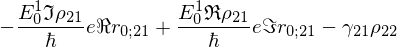

In [54]:
re(eqs[1,1]).expand()

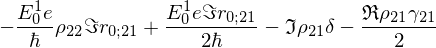

In [49]:
re(eqs[1,0])

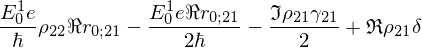

In [52]:
im(eqs[1,0])